# Prueba de evaluación 3 Entornos de data science con Python

**Parte 1:**

Como os indiqué en clase, en esta prueba abierta de temática libre trata de que hagáis un análisis de un dataset que vosotros seleccionéis (del repositorio de statsmodels, del de R o de cualquier otro que encontréis en Internet). Se valorará la presentación de las ideas de análisis, el uso de la herramienta de los Notebooks, gráficos que sean relevantes y de las bibliotecas del stack científico de Python. 
 
Solo se pide llegar al análisis estadístico básico, no a hacer modelos productivos con aprendizaje automático. No se pretende hacer un estudio estadístico inferencias avanzado sino un estudio exploratorio que muestre hallazgos interesantes en el dataset. Es muy valorable el cómo comuniquéis los hallazgos, por lo que no es cuestión de incluir todos los análisis, sino los que resulten informativos e interesantes, en formatos gráficos o numéricos fáciles de leer y entender. 

### Dataset Premier League Temporada 2011-12

El dataset seleccionado, es relacionado a las estadisticas de los partidos de la Premier League de la temporada 2011-12, en la cual se tienen estadisticas por partido y jugador de todo lo que hicieron en el partidos (pases, goles, tiempo jugado, tiros al arco, etc.). 
Trataremos de ver el dataset en sus datos mas importantes y sacar algunas concluciones de esta informacion.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fileop = 'PL2011-12MatchbyMatch.xls'
print "Operando archivo -- > " + fileop
Premierleague = pd.read_excel(fileop, header=0)

Operando archivo -- > PL2011-12MatchbyMatch.xls


In [4]:
Premierleague.head(10)

,Date,Player ID,Player Surname,Player Forename,Team,Team Id,Opposition,Opposition id,Venue,Position Id,...,Pass Left,Pass Right,Unsuccessful Ball Touch,Successful Ball Touch,Take-Ons Overrun,CompId,SeasId,Touches open play final third,Touches open play opp box,Touches open play opp six yards
0,2012-04-28,28566,Abou Diaby,Vassiriki,Arsenal,3,Stoke City,110,Away,4,...,2,4,0,0,0,8,2011,2,1,0
1,2011-11-26,28566,Abou Diaby,Vassiriki,Arsenal,3,Fulham,54,Home,4,...,5,7,0,0,0,8,2011,11,1,0
2,2012-03-03,28566,Abou Diaby,Vassiriki,Arsenal,3,Liverpool,14,Away,4,...,5,3,2,0,0,8,2011,4,0,0
3,2012-04-21,28566,Abou Diaby,Vassiriki,Arsenal,3,Chelsea,8,Home,4,...,6,9,0,0,0,8,2011,8,1,0
4,2012-01-03,20208,Adam,Charlie,Liverpool,14,Manchester City,43,Away,4,...,13,12,0,4,0,8,2011,16,3,0
5,2011-08-13,20208,Adam,Charlie,Liverpool,14,Sunderland,56,Home,4,...,21,15,1,1,0,8,2011,15,1,0
6,2012-03-10,20208,Adam,Charlie,Liverpool,14,Sunderland,56,Away,4,...,9,19,1,3,0,8,2011,14,0,0
7,2011-11-05,20208,Adam,Charlie,Liverpool,14,Swansea City,80,Home,4,...,31,21,0,2,0,8,2011,22,0,0
8,2011-12-05,20208,Adam,Charlie,Liverpool,14,Fulham,54,Away,4,...,26,16,1,1,0,8,2011,17,3,0
9,2012-01-31,20208,Adam,Charlie,Liverpool,14,Wolverhampton Wanderers,39,Away,4,...,18,15,0,2,0,8,2011,11,2,0


Vemos si hay NAN en el dataset

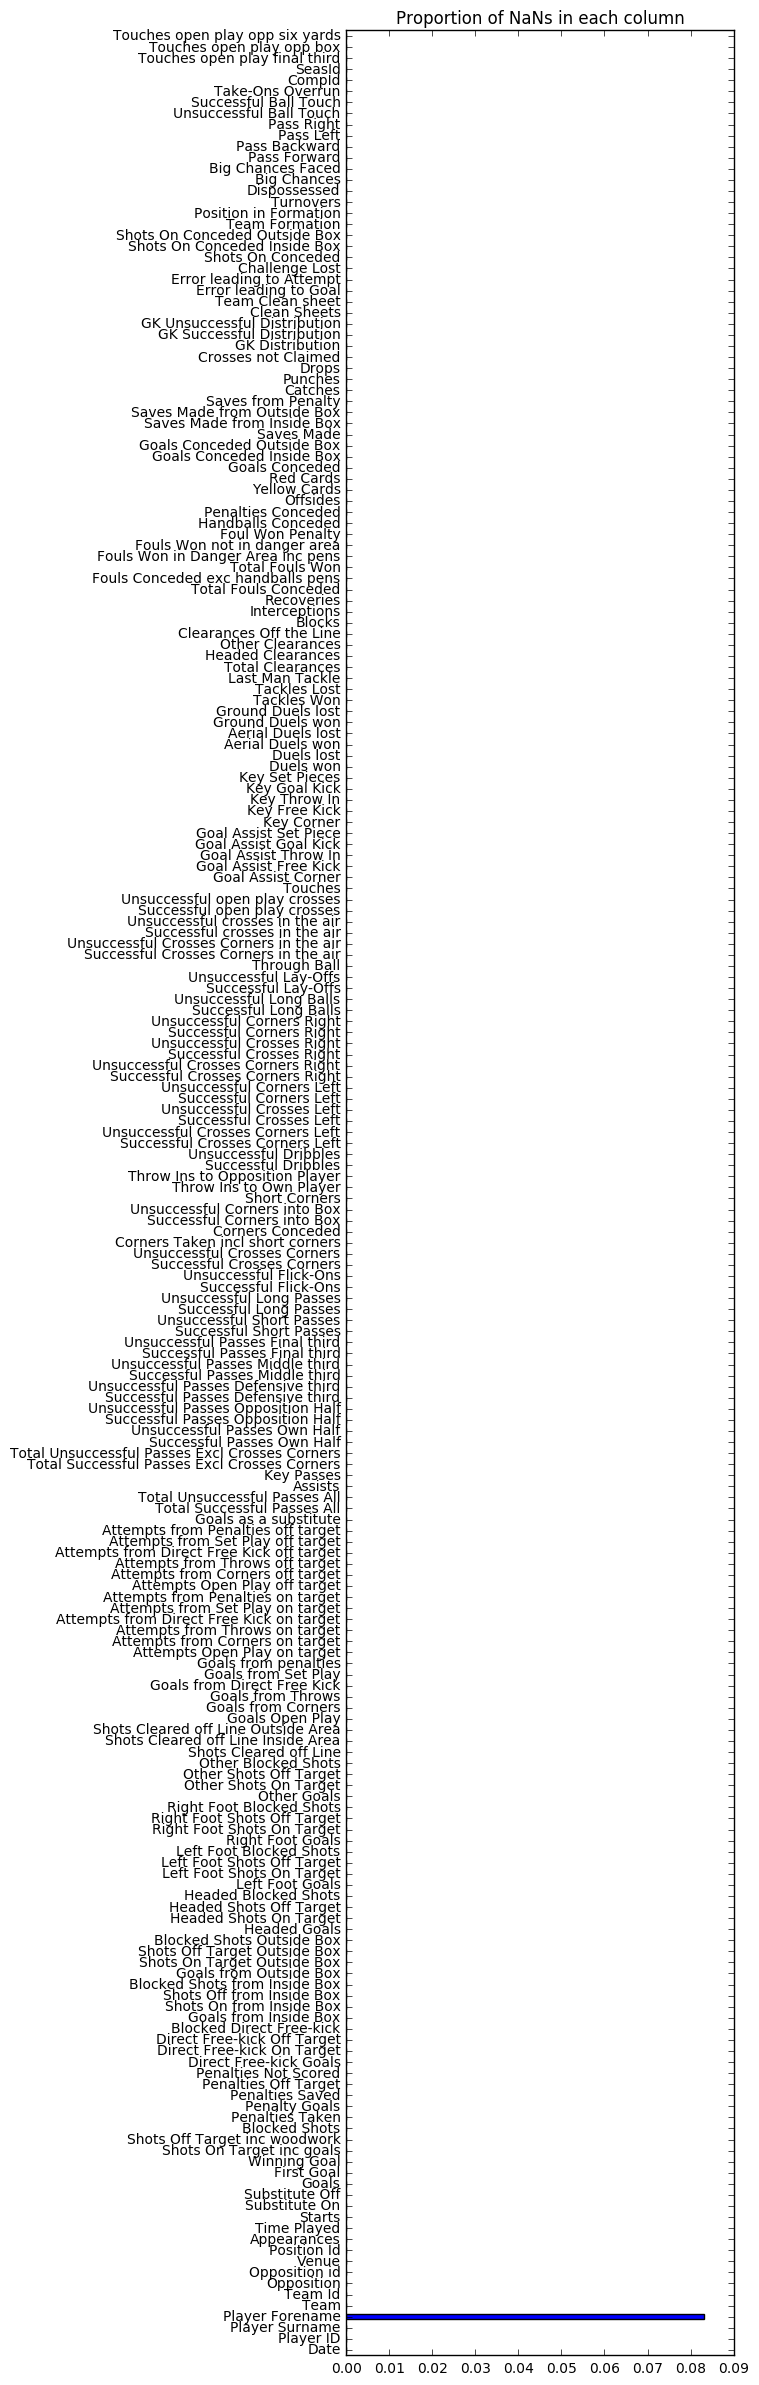

In [7]:
%matplotlib inline
plt.figure(figsize=(5, 30))
Premierleague.isnull().mean(axis=0).plot.barh()
plt.title("NaNs por columna")